In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cmath

In [2]:
a0, a1 = 1., 0.002
w0, w1 = 5.1, 25.5
T = 2 * np.pi
N = 300

In [3]:
f = lambda t: a0 * np.sin(w0 * t) + a1 * np.sin(w1 * t)   # функция исходного сигнала

In [4]:
w = lambda n: 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1))) # окно Ханна

In [5]:
t = np.linspace(0., T, N) # временная сетка из N точек
x = f(t)                  # выборка сигнала
hann = w(np.arange(N))    # окно Ханна на сетке

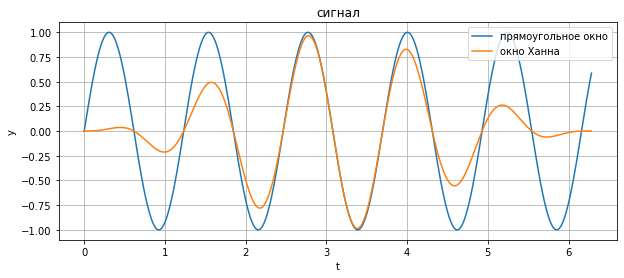

In [6]:
plt.figure(figsize=(10, 4))

plt.plot(t, x, label='прямоугольное окно')
plt.plot(t, x * hann, label='окно Ханна')
plt.xlabel('t')
plt.ylabel('y')
plt.title('сигнал')
plt.legend()
plt.grid()
plt.show()

In [7]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x) / N
    return X

In [8]:
dft = DFT(x)
dft_win = DFT(x * hann)

In [9]:
freq = 2 * np.pi * np.arange(N) / T

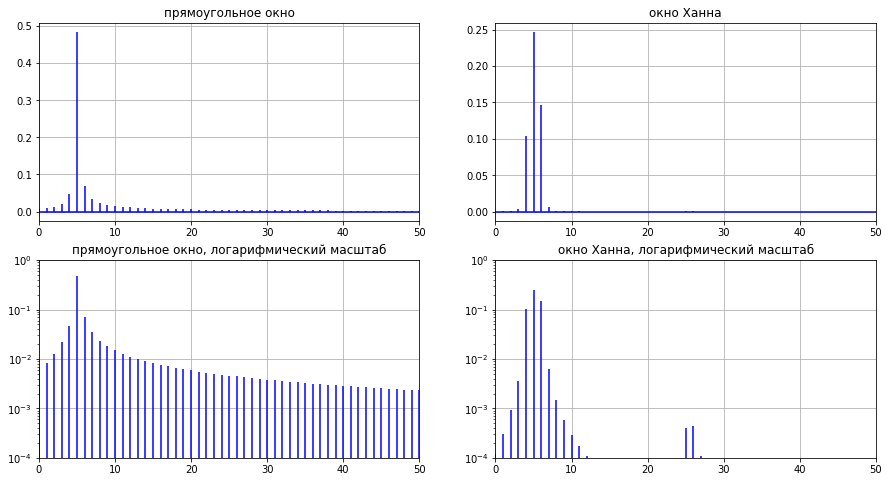

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.stem(freq, abs(dft), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlim([0, 50])
#plt.ylim([0, 4])
#plt.yscale('log')
plt.grid()
plt.title('прямоугольное окно')

plt.subplot(2, 2, 2)
plt.stem(freq, abs(dft_win), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlim([0, 50])
#plt.ylim([0, 4])
#plt.yscale('log')
plt.grid()
plt.title('окно Ханна')

plt.subplot(2, 2, 3)
plt.stem(freq, abs(dft), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlim([0, 50])
plt.ylim([.0001, 1])
plt.yscale('log')
plt.grid()
plt.title('прямоугольное окно, логарифмический масштаб')

plt.subplot(2, 2, 4)
plt.stem(freq, abs(dft_win), 'b', \
         markerfmt=" ", basefmt="-b", use_line_collection=True)
plt.xlim([0, 50])
plt.ylim([.0001, 1])
plt.yscale('log')
plt.grid()
plt.title('окно Ханна, логарифмический масштаб')

plt.show()